<a href="https://colab.research.google.com/github/christophermalone/DSCI325/blob/main/Module3_Part3_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 | Part 3 | SQL : MUTATE() Actions in SQL

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

### Example 3.3.1R
For this notebook, consider the Nursing Home Provider dataset.  The datasets is published by the Centers for Medicare and Medicade Services.

<table>
<tr>
<td colspan="2" align='center'>Fields in Dataset</td>
</tr>
<tr>
<td valign='top' align='left'>
1: FPN (Federal Provider Number)<br>
2: ProviderName<br>
3: ProviderAddress<br>
4: ProviderCounty<br>
5: OwnershipType<br><br>
6: NumberBeds<br>
7: AverageResidentsperDay<br><br>
8: ProviderInHospital<br>
9: BusinessName<br>
10: ContinuingCareRetirementCommunity<br><br>
11: HealthInspection_MoreThan2YearsAgo<br>
12: Overall_Rating<br>
13: HealthInspection_Rating<br>
14: QM_Rating<br>
15: LongStayQM_Rating<br>
16: ShortStayQM_Rating<br>
17: Staffing_Rating<br>
18: RNStaffing_Rating<br>
</td>
<td valign='top' align='left'>
19: NurseAideStaffing_Hours<br>
20: LPNStaffing_Hours<br>
21: RNStaffing_Hours<br>
22: LicensedStaffing_Hours<br>
23: TotalNurseStaffing_Hours<br>
24. TotalNurseStaffing_Hours_Weekend<br>
25. NursingStaff_Turnover<br>
26: RatingCycle1_Date<br>
27: RatingCycle1_HealthDeficiencyScore<br>
28: RatingCycle2_Date<br>
29: RatingCycle2_HealthDeficiencyScore<br>
30: RatingCycle3_Date<br>
31: RatingCycle3_HealthDeficiencyScore<br><br>
32: NumberofFines<br>
33: TotalAmountFines<br>
</td>
</tr>
</table>

 
<br>Original Data Source: https://data.cms.gov/provider-data/search?theme=Nursing%20homes%20including%20rehab%20services

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Making a Connection

Here, an SQLite3 package will be used to connect to the desired database.

In [32]:
import pandas as pd
import sqlite3

# Getting Table Names and Structure

Doing an initial query to identify the table within this database.

In [33]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query(
                        "SELECT name FROM sqlite_master WHERE type='table'"
                          , connect_db)
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,name
0,Providers


Next, getting the structure of the the <strong>Providers</strong> table.

In [34]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query(
                        "PRAGMA table_info(Providers)"
                          , connect_db)
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head(50)

,cid,name,type,notnull,dflt_value,pk
0,0,FPN,VARCHAR,0,None,1
1,1,ProviderName,VARCHAR,0,None,0
2,2,ProviderAddress,VARCHAR,0,None,0
3,3,ProviderCounty,VARCHAR,0,None,0
4,4,OwnershipType,VARCHAR,0,None,0
5,5,NumberBeds,INTEGER,0,None,0
6,6,AverageResidentsperDay,DOUBLE,0,None,0
7,7,ProviderinHospital,VARCHAR,0,None,0
8,8,BusinessName,VARCHAR,0,None,0
9,9,ContinuingCareRetirementCommunity,VARCHAR,0,None,0


# Create New Field - Numeric

To begin, let's compute the Capacity of each nursing home in the database.

$$Capacity = \frac{Average \space Residents \space per \space Day}{Number \space of \space Beds}$$

<strong>Note:</strong> The triple quote, i.e. """, in Python permits code to be written over multiple lines.  This will be used here to make the code more readable.

In [35]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ProviderName, 
                                 (AverageResidentsperDay/NumberBeds) AS Capacity 
                          FROM Providers
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,ProviderName,Capacity
0,"BURNS NURSING HOME, INC.",0.933333
1,COOSA VALLEY HEALTHCARE CENTER,0.938824
2,HIGHLANDS HEALTH AND REHAB,0.798000
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,0.754348
4,PLANTATION MANOR NURSING HOME,0.702913


Next, consider the use of <strong>ORDER BY</strong> which can be used to sort the outcomes from the SELECT statement.  The <strong>DESC</strong> option for ORDER BY will sort the Capacity values in descending order.

In [36]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ProviderName, 
                                 (AverageResidentsperDay/NumberBeds) AS Capacity 
                          FROM Providers
                          ORDER BY Capacity DESC
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,ProviderName,Capacity
0,EDENBROOK LAKESIDE,82.300000
1,THE CENTER AT GRANDE,12.583333
2,AUGUSTA MEDICAL CTR SKILLED CA,5.841176
3,MARYLAND GARDENS CARE CENTER,5.312500
4,WOONSOCKET HEALTH CENTRE,4.334615


A Capacity value over 1 indicates the nursing home has a capacity larger than 100%.  A WHERE statement can be used to filter out such nursing homes.  

<strong>Note:</strong>  At times, SQL requires statements in a particular order.  Here, the WHERE statements must come before the ORDER BY statement.

In [37]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ProviderName, 
                                 (AverageResidentsperDay/NumberBeds) AS Capacity 
                          FROM Providers
                          WHERE Capacity <= 1
                          ORDER BY Capacity DESC
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,ProviderName,Capacity
0,PROVIDENCE VALDEZ MEDICAL CENTER,1.0
1,LAUREL PARK BEHAVIORAL HEALTH CENTER,1.0
2,THE ROYAL HOME,1.0
3,PALM GARDEN OF ORLANDO,1.0
4,CANDLER SKILLED NURSING UNIT,1.0


# CONCATENATE, CAST, and ROUND in SQL

Consider the following use of the ROUND() and CAST() functions, and the concatenate utility to express the output as a percentage.


1.   ROUND(); can be used to round a number to a specific number of decimals
2.   CAST(); can be used to change the data type; this is necessary as the concatenate utility requires a string variable
3.   ||; SQLite does not support CONCAT() function, but instead uses the || syntax to piece together a set of strings into a larger string.



In [38]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ProviderName, 
                                 ( CAST(ROUND(100*(AverageResidentsperDay/NumberBeds),1) AS VARCHAR) || '%' ) AS Capacity 
                          FROM Providers
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,ProviderName,Capacity
0,"BURNS NURSING HOME, INC.",93.3%
1,COOSA VALLEY HEALTHCARE CENTER,93.9%
2,HIGHLANDS HEALTH AND REHAB,79.8%
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,75.4%
4,PLANTATION MANOR NURSING HOME,70.3%


Suppose an ORDER BY statement is included to sort the capacities from largest to smallest.

In [39]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ProviderName, 
                                 ( CAST(ROUND(100*(AverageResidentsperDay/NumberBeds),1) AS VARCHAR) || '%' ) AS Capacity 
                          FROM Providers
                          ORDER BY Capacity DESC
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.tail()

,ProviderName,Capacity
15219,IOWA PARK HEALTHCARE CENTER,0.0%
15220,SHEPHERD LTC PARTNERS INC.,0.0%
15221,LAS ALTURAS DE PENITAS,0.0%
15222,ESTATES AT SHAVANO PARK,0.0%
15223,KENT COUNTY NURSING HOME,0.0%


The output above is **not** correctly sorted -- or is it?  The data type for Capacity is a string; thus, sorting is indeed being done correctly in SQL.

<table>
<tr>
<td align="center">Values</td><td align="center">Values <br>AS String</td>
<td align="center"></td><td align="center">Sort <br>WHEN String</td><td align="center">Sort <br>WHEN Numeric</td>
</tr>
<td align="right">
<font size="+2">
99.6%<br>
0.0%<br>
1065.0%<br>
518.8%<br>
</font>
</td>
<td align="left">
<font size="+2">
"99.6%"<br>
"0.0%"<br>
"1065.0%"<br>
"518.8%"<br>
</font>
</td>
<td align="left">&nbsp;</td>

<td align="left">
<font size="+2">
"<u>0</u>.0%"<br>
"<u>1</u>065.0%"<br>
"<u>5</u>18.8%"<br>
"<u>9</u>9.6%"<br>
</font>
</td>
<td align="right">
<font size="+2">
0.0%<br>
99.6%<br>
518.8%<br>
1065.0%<br>
</font>
</td>
</tr>
</table>

To alleviate this issue, modify the SQL statement as follows.  Notice that the ORDER BY statement uses the numeric quantity to completing the sorting.

In [40]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
NursingHomes_Capacity = pd.read_sql_query("""
                          SELECT ProviderName, 
                                 AverageResidentsperDay/NumberBeds AS Capacity_Numeric,
                                 ( CAST(ROUND(100*(AverageResidentsperDay/NumberBeds),1) AS VARCHAR) || '%' ) AS Capacity 
                          FROM Providers
                          ORDER BY Capacity_Numeric DESC
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
NursingHomes_Capacity.head()

,ProviderName,Capacity_Numeric,Capacity
0,EDENBROOK LAKESIDE,82.300000,8230.0%
1,THE CENTER AT GRANDE,12.583333,1258.3%
2,AUGUSTA MEDICAL CTR SKILLED CA,5.841176,584.1%
3,MARYLAND GARDENS CARE CENTER,5.312500,531.3%
4,WOONSOCKET HEALTH CENTRE,4.334615,433.5%


## Using dfply to manage data frame

The object returned by the code above is a Python data frame.  Thus, Python can be used to manipulate this data frame.  For example, <strong>dfply</strong> can be used to select the only the ProviderName and Capacity from this data frame.

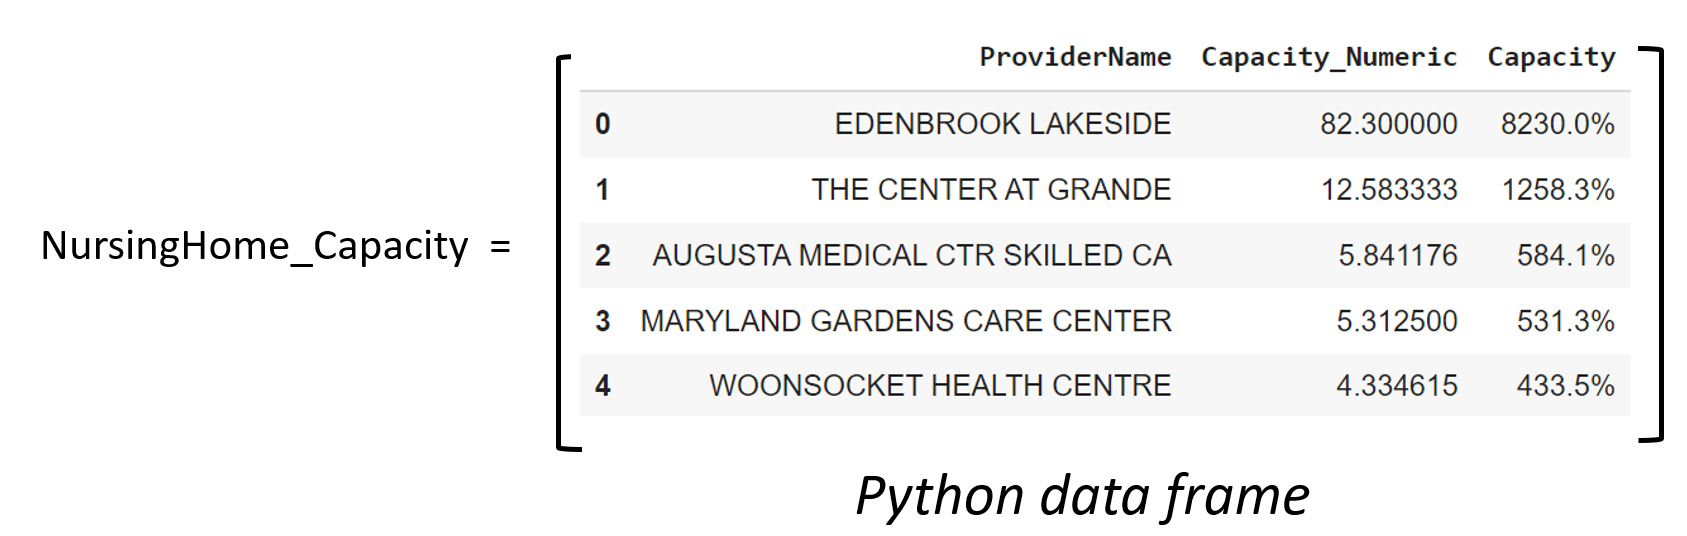

Loading <strong>dfply</strong> to this instance of Colab.

In [41]:
pip install dfply

Next, importing the package into this instance of Colab.

In [42]:
from dfply import *

Using the dfply package to <strong>select()</strong> only the desired columns.

In [43]:
#Piping in dfply and using select() to grab first two columns.
NursingHomes_Capacity_Updated = (
             NursingHomes_Capacity
             >> select(X.ProviderName, X.Capacity)
             #>> select(~X.Capacity_Numeric)  # Use this version if data frame has several columns to be included
           )
NursingHomes_Capacity_Updated.head()

,ProviderName,Capacity
0,EDENBROOK LAKESIDE,8230.0%
1,THE CENTER AT GRANDE,1258.3%
2,AUGUSTA MEDICAL CTR SKILLED CA,584.1%
3,MARYLAND GARDENS CARE CENTER,531.3%
4,WOONSOCKET HEALTH CENTRE,433.5%


## Using a Subquery to manage data frame

A subquery in SQL is simply a query within another query.  Subqueries are powerful ways to manipulate data tables that result from a SQL query.  Suqueries **do not** change the structure of the data tables within the database; but simply allow for the managment of data before the outcomes are pushed out to the user.

When reading / interpreting SQL code that contain subqueries, it is important to read the statement from the <i>inside</i> to the <i>outside</i>. Consider the SQL statement that was used above.

<font size="-1" color="red">
SELECT ProviderName,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AverageResidentsperDay/NumberBeds AS Capacity_Numeric,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;( CAST(ROUND(100*(AverageResidentsperDay/NumberBeds),1) AS VARCHAR) || '%' ) AS Capacity <br>
                            FROM Providers<br>
                            ORDER BY Capacity_Numeric DESC
</font>

The resulting output from this query is an SQL table.



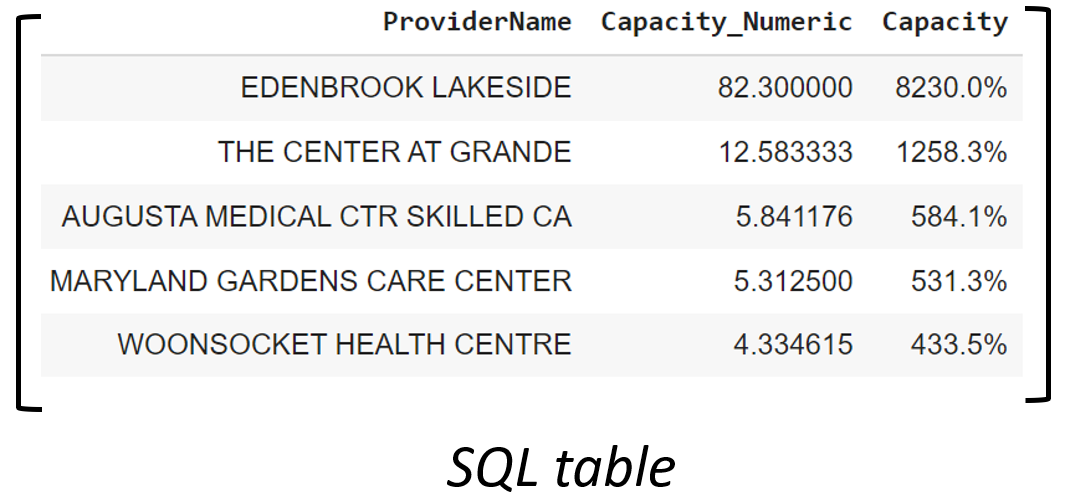

Now,  let us add a <font color="green"><strong>second SQL query</strong></font> that will be used to manage the SQL table returned by the <font color="red">first SQL query</font>.

<font size="-1" color="green">
SELECT ProviderName, Capacity <br>
&nbsp;&nbsp;&nbsp;FROM<br>
&nbsp;&nbsp;&nbsp;(<br>
<font size="-1" color="red">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;SELECT ProviderName,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AverageResidentsperDay/NumberBeds AS Capacity_Numeric,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;( CAST(ROUND(100*(AverageResidentsperDay/NumberBeds),1) AS VARCHAR) || '%' ) AS Capacity <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                            FROM Providers<br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                           ORDER BY Capacity_Numeric DESC
</font>
<br>
&nbsp;&nbsp;&nbsp;)
</font>


Visually, the <font color="green"><strong>second SQL query</strong></font> is simply selecting the desired columns from the SQL table returned from the <font color="red">first SQL query</font>.

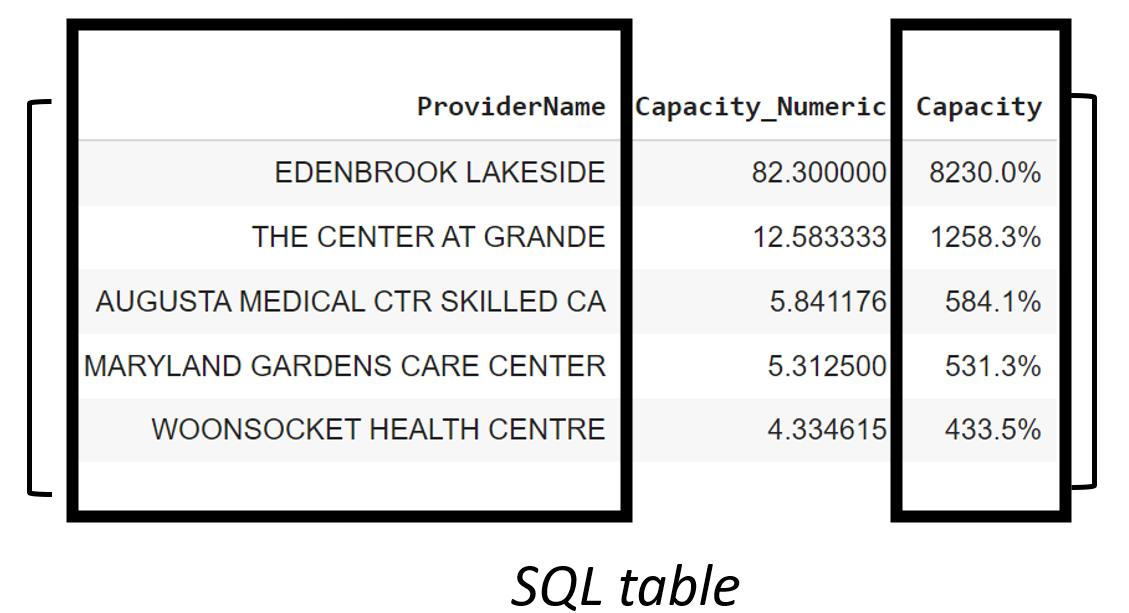

Putting the pieces together in SQL.

In [44]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
NursingHomes_Capacity = pd.read_sql_query("""
                          SELECT ProviderName, Capacity FROM
                           (
                            SELECT ProviderName, 
                                 AverageResidentsperDay/NumberBeds AS Capacity_Numeric,
                                 ( CAST(ROUND(100*(AverageResidentsperDay/NumberBeds),1) AS VARCHAR) || '%' ) AS Capacity 
                            FROM Providers
                            ORDER BY Capacity_Numeric DESC
                           )
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
NursingHomes_Capacity.head()

,ProviderName,Capacity
0,EDENBROOK LAKESIDE,8230.0%
1,THE CENTER AT GRANDE,1258.3%
2,AUGUSTA MEDICAL CTR SKILLED CA,584.1%
3,MARYLAND GARDENS CARE CENTER,531.3%
4,WOONSOCKET HEALTH CENTRE,433.5%


Next, consider the following code that computes the Average Fine Amount for each nursing home in the database.

In [45]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ProviderName, 
                                 (TotalAmountFines/NumberofFines) AS 'Average Fine Amount' 
                          FROM Providers

                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head(10)

,ProviderName,Average Fine Amount
0,"BURNS NURSING HOME, INC.",650.000000
1,COOSA VALLEY HEALTHCARE CENTER,650.000000
2,HIGHLANDS HEALTH AND REHAB,NaN
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,NaN
4,PLANTATION MANOR NURSING HOME,2777.666667
5,ATHENS HEALTH AND REHABILITATION LLC,NaN
6,MERRY WOOD LODGE,78676.000000
7,HATLEY HEALTH CARE INC,NaN
8,SENIOR REHAB & RECOVERY AT LIMESTONE HEALTH FA...,NaN
9,"WETUMPKA HEALTH AND REHABILITATION, LLC",NaN


The 'Average Fine Amount' cannot be computed because in many situations the NumberofFines = 0.  In this situation the <strong>CASE WHEN</strong> statement can be used to alleviate this issue. 

$$AverageFine = \Bigg\{ \begin{array} \tiny{\frac{\mbox{Total Amount of Fines}}{\mbox{Number of Fines}}} & when & \mbox{Number of Fines} > 0\\
0 &  when & \mbox{Number of Fines} = 0
\end{array}$$

In [49]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ProviderName, NumberofFines,
                                 CASE
                                     WHEN NumberofFines > 0 THEN  (TotalAmountFines/NumberofFines)
                                     ELSE 0.0
                                 END AS 'Average Fine Amount' 
                          FROM Providers
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head(10)

,ProviderName,NumberofFines,Average Fine Amount
0,"BURNS NURSING HOME, INC.",1.0,650.000000
1,COOSA VALLEY HEALTHCARE CENTER,1.0,650.000000
2,HIGHLANDS HEALTH AND REHAB,0.0,0.000000
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,0.0,0.000000
4,PLANTATION MANOR NURSING HOME,3.0,2777.666667
5,ATHENS HEALTH AND REHABILITATION LLC,0.0,0.000000
6,MERRY WOOD LODGE,1.0,78676.000000
7,HATLEY HEALTH CARE INC,0.0,0.000000
8,SENIOR REHAB & RECOVERY AT LIMESTONE HEALTH FA...,0.0,0.000000
9,"WETUMPKA HEALTH AND REHABILITATION, LLC",0.0,0.000000


# Create New Field - STRING

There are a set of string functions that can be used in SQL.  SQLite contains a smaller subset of these string functions.  A description of commonly used string function in SQLite is provided on the following website.

Common SQLite String Functions: https://www.sqlitetutorial.net/sqlite-string-functions/ 

### Getting Last Two Characters in a String

The <strong>SUBSTR</strong> statement in SQL can be used to obtain a subset of a string.  Similar to R/Python, the negative index can be used to start from the right-end of the string.

<p align="center">
<font size="+2">
SUBSTR( <i>string</i>, start = ____, length = ____)
</font>
</p>

To obtain the State field, we will apply the SUBSTR() function to the ProviderCounty field.  Consider the following setup for the SUBSTR() function.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1E9rTKKAFIskDOcCJbPunrVE6QLFfwaMh" width='50%' height='50%'></p>

<strong>Note:</strong>:  If there is any chance of a phymtom space at the end of the string, the TRIM() function should be used before applying the SUBSTR() function.


In [52]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT SUM(TotalAmountFines) AS TotalFines , SUBSTR(ProviderCounty, -2, 2) AS State
                          FROM Providers
                          GROUP BY State
                          ORDER BY TotalFines DESC
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head(10)

,TotalFines,State
0,38897395.01,TX
1,37390711.42,IL
2,32853798.04,MI
3,24035650.76,OH
4,21776846.68,CA
5,18055369.78,FL
6,17640627.18,IN
7,15288275.50,NC
8,14157065.98,KY
9,13504793.12,MA


### Splitting a String

<strong>Goal</strong>: Create the following table.

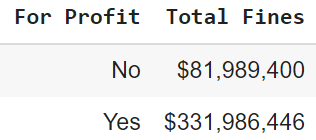

The necessary steps to accompish the goal:


1.   Split the OwnershipType apart on the dash; retain the contents to the left of the dash
2.   Create a field called ForProfit; accomplish this by recoding the ProfitType; For Profit -> "Yes", Non profit -> "No", and Government -> "No"
3.   Obtain SUM(Fines) for each ForProfit type
4.   Format as necessary



### Step #1: Split OwnershipType apart on dash

In [54]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                       SELECT OwnershipType, TRIM( SUBSTR(OwnershipType, 1, INSTR(OwnershipType,"-")-2) ) AS ProfitType, TotalAmountFines
                       FROM Providers
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,OwnershipType,ProfitType,TotalAmountFines
0,For profit - Corporation,For profit,650.0
1,For profit - Corporation,For profit,650.0
2,Government - County,Government,0.0
3,For profit - Individual,For profit,0.0
4,For profit - Individual,For profit,8333.0


### Step #2: Create new ForProfit field

In [55]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                           SELECT ProfitType, 
                                   CASE
                                      WHEN ProfitType == 'For profit' THEN 'Yes'
                                      ELSE 'No'
                                   END AS ForProfit 
                                  
                            FROM
                                (
                                  SELECT OwnershipType, TRIM( SUBSTR(OwnershipType, 1, INSTR(OwnershipType,"-")-2) ) AS ProfitType, TotalAmountFines
                                  FROM Providers
                                )
                           
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,ProfitType,ForProfit
0,For profit,Yes
1,For profit,Yes
2,Government,No
3,For profit,Yes
4,For profit,Yes


### Step #3 Obtain SUM(Fines) for each ForProfit level

In [56]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                            SELECT ProfitType, 
                                   CASE
                                      WHEN ProfitType == 'For profit' THEN 'Yes'
                                      ELSE 'No'
                                   END AS ForProfit, 
                                   SUM(TotalAmountFines) as TotalFines
                            FROM
                                (
                                  SELECT OwnershipType, TRIM( SUBSTR(OwnershipType, 1, INSTR(OwnershipType,"-")-2) ) AS ProfitType, TotalAmountFines
                                  FROM Providers
                                )
                            GROUP BY ForProfit
                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,ProfitType,ForProfit,TotalFines
0,Government,No,8.198940e+07
1,For profit,Yes,3.319864e+08


### Format Output for Dollars

In [59]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ForProfit AS 'For Profi Org?', '$' || CAST( CAST(TotalFines AS INT) AS VARCHAR)  AS 'Total Fines' 
                          FROM
                          (
                            SELECT ProfitType, 
                                   CASE
                                      WHEN ProfitType == 'For profit' THEN 'Yes'
                                      ELSE 'No'
                                   END AS ForProfit, 
                                   SUM(TotalAmountFines) as TotalFines
                            FROM
                                (
                                  SELECT OwnershipType, TRIM( SUBSTR(OwnershipType, 1, INSTR(OwnershipType,"-")-2) ) AS ProfitType, TotalAmountFines
                                  FROM Providers
                                )
                            GROUP BY ForProfit
                           )

                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,For Profit,Total Fines
0,No,$81989400
1,Yes,$331986446


<strong>Questions</strong>:


1.   What is the purpose of the TRIM() function on Line 17 in the code chunk above?

2.   Rewrite the CASE statement without the use of ELSE.  That is, specify an outcome for each ProfitType level separately.

3.   Remove the inner CAST() on Line 6.  What is the effect of removing this on the desired output?

4.   Remove the outer CAST() on Line 6.  What is the effect of removing this on the desired output?   The concatenate operator, i.e. '||', only works on strings.  What is SQL doing when the outer CAST() is removed?  Discuss briefly.



<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>

## Aside -- Using a system level print() function to obtain desired formatting

The <strong>printf()</strong> function is a system level print function that allows formatting to be done.  The formatting structure is passed through as a string in the first argument of this function.


1.   Desired format structure is passed as the first argument in printf() function.
2.   The % is used to define the start of the desired format
3.   The , says use a comma to seperate the value
4.   The i says use an interger format for the value



In [58]:
#Making a connection
connect_db = sqlite3.connect("/content/sample_data/NursingHomes_Providers.db")

#SQL Statement
df = pd.read_sql_query("""
                          SELECT ForProfit AS 'For Profit', printf('$%,i', TotalFines) AS 'Total Fines' 
                          FROM
                          (
                            SELECT ProfitType, 
                                 CASE
                                    WHEN ProfitType == 'For profit' THEN 'Yes'
                                    ELSE 'No'
                                  END AS ForProfit, 
                                 SUM(TotalAmountFines) as TotalFines
                            FROM
                                (
                                  SELECT OwnershipType, TRIM( SUBSTR(OwnershipType, 1, INSTR(OwnershipType,"-")-2) ) AS ProfitType, TotalAmountFines
                                  FROM Providers
                               )
                            GROUP BY ForProfit
                           )

                       """
                          , connect_db)
                       
#Closing the connection
connect_db.close()

#Using pandas to show output
df.head()

,For Profit,Total Fines
0,No,"$81,989,400"
1,Yes,"$331,986,446"


<table width='100%' ><tr><td bgcolor='orange'></td></tr></table>



---

---









<strong>Task</strong>

Obtain the following table of counts for the number nursing homes in MN that are corporations and not corporations. 

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Wl_JNHduz3Vo0rEeI5e0k4y8VLzVhNRx" width='25%' height='25%'></p>

Recall, the CorporationType is obtained from the right-hand side of the OwnershipType after splitting. In addition, use the following table for the definition of Corporation.

<table>
<tr>
<td align="center">CorporationType</td>
<td align="center">Corporation</td>
</tr>
<tr>
 <td align="center"><font size="+1">Corporation</font></td>
 <td align="center"><font size="+1">Yes</font></td>
</tr>
<tr>
 <td align="center"><font size="+1">Limited Liability company</font></td>
  <td align="center"><font size="+1">Yes</font></td>
</tr>

<tr>
 <td align="center"><font size="+1">County</font></td>
 <td align="center" rowspan="10"><font size="+1">No</font></td>
</tr>
<tr>
 <td align="center"><font size="+1">Individual</font></td>
 
</tr>

<tr>
 <td align="center"><font size="+1">Other</font></td>

</tr>
<tr>
 <td align="center"><font size="+1">Partnership</font></td>

</tr>
<tr>
 <td align="center"><font size="+1">City</font></td>

</tr>
<tr>
 <td align="center"><font size="+1">Church related</font></td>
 
</tr>
<tr>
 <td align="center"><font size="+1">City/county</font></td>

</tr>
<tr>
 <td align="center"><font size="+1">Federal</font></td>
 
</tr>
<tr>
 <td align="center"><font size="+1">State</font></td>
 
</tr>
<tr>
 <td align="center"><font size="+1">Hospital district</font></td>
 
</tr>
</table>